In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
from matplotlib import pyplot as plt

# first download 5-year stock data from yahoo.finance
# then change data type in 'Date' column into yy-mm-dd type and save
df = pd.read_csv('NVDA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-19,62.044998,62.337502,59.250000,60.250000,59.649902,71377200
1,2018-03-20,60.279999,62.787498,60.279999,62.395000,61.773552,55469600
2,2018-03-21,62.330002,63.000000,61.832500,62.139999,61.521091,43868800
3,2018-03-22,61.500000,61.970001,60.084999,60.462502,59.860310,55119600
4,2018-03-23,60.599998,60.625000,58.130001,58.242500,57.662403,73562000
...,...,...,...,...,...,...,...
1504,2024-03-11,864.289978,887.969971,841.659973,857.739990,857.739990,67836400
1505,2024-03-12,880.489990,919.599976,861.500000,919.130005,919.130005,66807500
1506,2024-03-13,910.549988,915.039978,884.349976,908.880005,908.880005,63571300
1507,2024-03-14,895.770020,906.460022,866.000000,879.440002,879.440002,60231800


In [2]:
test_size = 0.05               # proportion of dataset to be used as test set
cv_size = 0.25                 # proportion of dataset to be used as cross-validation set


In [3]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
data = pd.DataFrame(df[['Date', 'Adj Close']])
data

,Date,Adj Close
0,2018-03-19,59.649902
1,2018-03-20,61.773552
2,2018-03-21,61.521091
3,2018-03-22,59.860310
4,2018-03-23,57.662403
...,...,...
1504,2024-03-11,857.739990
1505,2024-03-12,919.130005
1506,2024-03-13,908.880005
1507,2024-03-14,879.440002


In [5]:
num_valid = int(test_size*len(data))
num_train = len(data) - num_valid
print("total number = ", len(data))
print("num_train = " + str(num_train))
print("num_valid = " + str(num_valid))

# Split into train, cv, and test
traind = data[:num_train][['Date', 'Adj Close']]
valid = data[num_train:][['Date', 'Adj Close']]
print("train shape = " + str(traind.shape))
print("validation shape = " + str(valid.shape))

total number =  1509
num_train = 1434
num_valid = 75
train shape = (1434, 2)
validation shape = (75, 2)


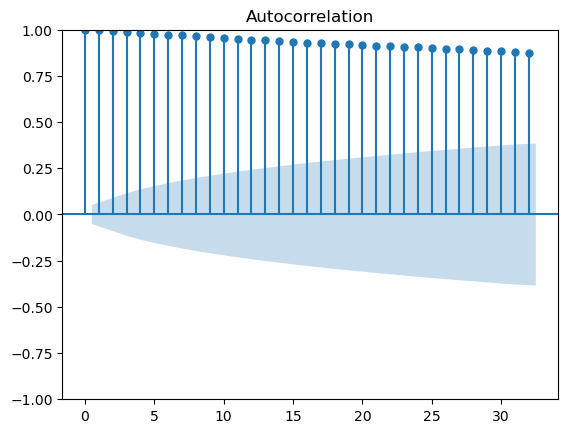

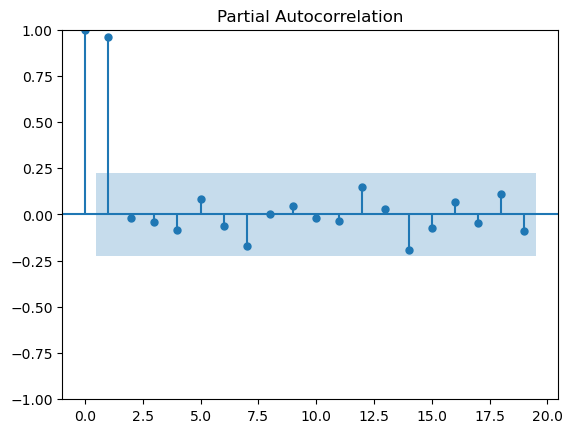

In [6]:
# ACF and PACF plots:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_orig = plot_acf(traind['Adj Close'])
pacf_orig = plot_pacf(valid['Adj Close'])

In [7]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(traind['Adj Close'])
print(f'p-value: {adf_test[1]}')


p-value: 0.9952412543987788


In [8]:
traind

,Date,Adj Close
0,2018-03-19,59.649902
1,2018-03-20,61.773552
2,2018-03-21,61.521091
3,2018-03-22,59.860310
4,2018-03-23,57.662403
...,...,...
1429,2023-11-20,504.022034
1430,2023-11-21,499.372650
1431,2023-11-22,487.094330
1432,2023-11-24,477.695618


In [9]:
a= traind['Adj Close'].diff(1).dropna()
a = a.rename('Adj_Close')
a

1        2.123650
2       -0.252461
3       -1.660781
4       -2.197907
5        2.848847
          ...    
1429    11.108490
1430    -4.649384
1431   -12.278320
1432    -9.398712
1433     4.659362
Name: Adj_Close, Length: 1433, dtype: float64

In [10]:
traind = pd.merge(traind, a, left_index=True, right_index=True)
traind

,Date,Adj Close,Adj_Close
1,2018-03-20,61.773552,2.123650
2,2018-03-21,61.521091,-0.252461
3,2018-03-22,59.860310,-1.660781
4,2018-03-23,57.662403,-2.197907
5,2018-03-26,60.511250,2.848847
...,...,...,...
1429,2023-11-20,504.022034,11.108490
1430,2023-11-21,499.372650,-4.649384
1431,2023-11-22,487.094330,-12.278320
1432,2023-11-24,477.695618,-9.398712


<Axes: >

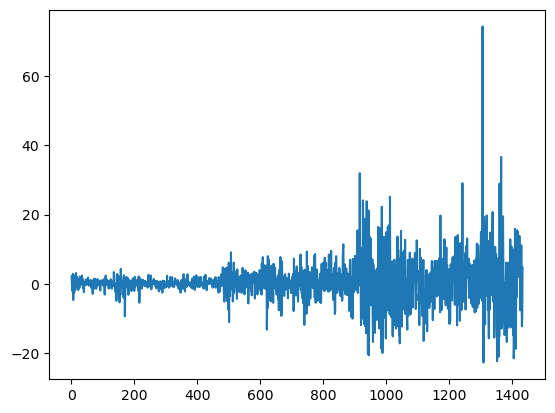

In [11]:
traind['Adj_Close'].plot()

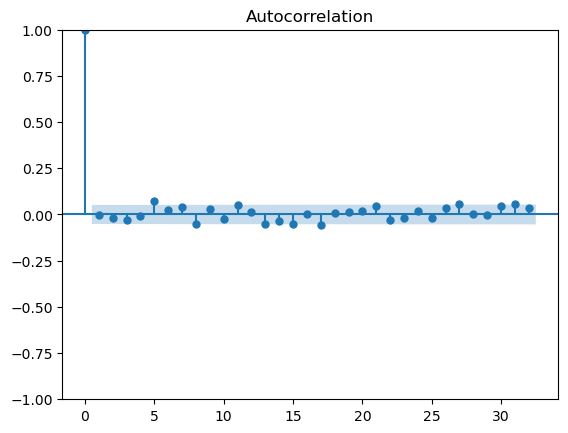

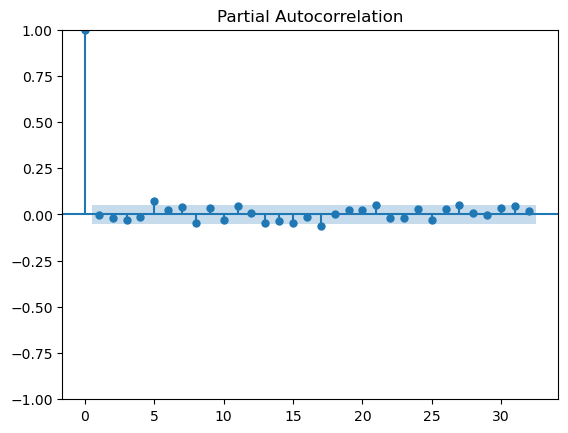

In [12]:
acf_diff = plot_acf(traind['Adj_Close'].dropna())
pacf_diff = plot_pacf(traind['Adj_Close'].dropna())

In [13]:
# ADF test again
adf_test2 = adfuller(traind['Adj_Close'].dropna())
print(f'p-value: {adf_test2[1]}')
print(format(adf_test2[1], '.4f'))


p-value: 4.270727176097418e-18
0.0000


In [14]:
traind=traind.reset_index(drop=True)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
traind_scaled = scaler.fit_transform(pd.DataFrame(traind['Adj Close']))
traind_scaled
train_new = pd.concat([traind, pd.Series(traind_scaled[:,0],name="adj close")], axis=1)
train_new

,Date,Adj Close,Adj_Close,adj close
0,2018-03-20,61.773552,2.123650,-0.803195
1,2018-03-21,61.521091,-0.252461,-0.805351
2,2018-03-22,59.860310,-1.660781,-0.819536
3,2018-03-23,57.662403,-2.197907,-0.838308
4,2018-03-26,60.511250,2.848847,-0.813976
...,...,...,...,...
1428,2023-11-20,504.022034,11.108490,2.974003
1429,2023-11-21,499.372650,-4.649384,2.934293
1430,2023-11-22,487.094330,-12.278320,2.829425
1431,2023-11-24,477.695618,-9.398712,2.749152


In [16]:
scaler2 = StandardScaler()
valid_scaled = scaler2.fit_transform(pd.DataFrame(valid['Adj Close']))
valid = valid.reset_index(drop=True)
valid_new = pd.concat([valid, pd.Series(valid_scaled[:,0])], axis=1)
valid_new = valid_new.rename(columns={0: "adj close"})
valid_new

,Date,Adj Close,adj close
0,2023-11-28,478.145508,-1.024678
1,2023-11-29,481.335083,-1.002734
2,2023-11-30,467.636963,-1.096976
3,2023-12-01,467.586945,-1.097320
4,2023-12-04,455.038666,-1.183651
...,...,...,...
70,2024-03-11,857.739990,1.586902
71,2024-03-12,919.130005,2.009260
72,2024-03-13,908.880005,1.938741
73,2024-03-14,879.440002,1.736196


In [17]:
!pip install pmdarima
import pmdarima as pm
from pmdarima import auto_arima

fit = auto_arima(train_new['adj close'].dropna(), trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4413.195, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4420.712, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4418.729, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4418.729, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4419.334, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4416.729, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.022 seconds


In [18]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_new['adj close'].dropna(), order = (0,1,0)).fit()

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:              adj close   No. Observations:                 1433
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2210.667
Date:                Wed, 17 Apr 2024   AIC                          -4419.334
Time:                        19:44:08   BIC                          -4414.067
Sample:                             0   HQIC                         -4417.367
                               - 1433                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0027   3.04e-05     87.696      0.000       0.003       0.003
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             22748.43
Prob(Q):                              0.90   Pr

In [19]:
train_pred = pd.concat([train_new, pd.Series(model.fittedvalues)], axis=1)
train_pred = train_pred.rename(columns={0: "prediction"})
train_pred

,Date,Adj Close,Adj_Close,adj close,prediction
0,2018-03-20,61.773552,2.123650,-0.803195,0.000000
1,2018-03-21,61.521091,-0.252461,-0.805351,-0.803195
2,2018-03-22,59.860310,-1.660781,-0.819536,-0.805351
3,2018-03-23,57.662403,-2.197907,-0.838308,-0.819536
4,2018-03-26,60.511250,2.848847,-0.813976,-0.838308
...,...,...,...,...,...
1428,2023-11-20,504.022034,11.108490,2.974003,2.879127
1429,2023-11-21,499.372650,-4.649384,2.934293,2.974003
1430,2023-11-22,487.094330,-12.278320,2.829425,2.934293
1431,2023-11-24,477.695618,-9.398712,2.749152,2.829425


In [20]:
# convert the prediction to original scale
# remove scaling
std = np.std(train_pred['Adj Close'])
mean = train_pred['Adj Close'].mean()
pred_noscl = train_pred['prediction'].dropna() * std + mean
pred_noscl

# remove differencing
# pred_nodiff = pd.DataFrame(pred_noscl)
# pred_nodiff = np.cumsum(pred_nodiff, axis=0)
# pred_nodiff
train_pred = pd.concat([train_pred, pd.Series(pred_noscl,name='pre')], axis=1)
# train_pred = train_pred.drop(train_pred.columns[4], axis = 1)
train_pred


,Date,Adj Close,Adj_Close,adj close,prediction,pre
0,2018-03-20,61.773552,2.123650,-0.803195,0.000000,155.814649
1,2018-03-21,61.521091,-0.252461,-0.805351,-0.803195,61.773552
2,2018-03-22,59.860310,-1.660781,-0.819536,-0.805351,61.521091
3,2018-03-23,57.662403,-2.197907,-0.838308,-0.819536,59.860310
4,2018-03-26,60.511250,2.848847,-0.813976,-0.838308,57.662403
...,...,...,...,...,...,...
1428,2023-11-20,504.022034,11.108490,2.974003,2.879127,492.913544
1429,2023-11-21,499.372650,-4.649384,2.934293,2.974003,504.022034
1430,2023-11-22,487.094330,-12.278320,2.829425,2.934293,499.372650
1431,2023-11-24,477.695618,-9.398712,2.749152,2.829425,487.094330


In [21]:
fore = model.get_forecast(75, alpha=0.05)
fc = fore.predicted_mean
fc = fc.reset_index(drop=True)
conf = fore.conf_int(alpha = 0.05)


valid_pred = pd.concat([valid_new, pd.Series(fc)], axis=1)
valid_pred

c:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,Date,Adj Close,adj close,predicted_mean
0,2023-11-28,478.145508,-1.024678,2.788947
1,2023-11-29,481.335083,-1.002734,2.788947
2,2023-11-30,467.636963,-1.096976,2.788947
3,2023-12-01,467.586945,-1.097320,2.788947
4,2023-12-04,455.038666,-1.183651,2.788947
...,...,...,...,...
70,2024-03-11,857.739990,1.586902,2.788947
71,2024-03-12,919.130005,2.009260,2.788947
72,2024-03-13,908.880005,1.938741,2.788947
73,2024-03-14,879.440002,1.736196,2.788947


In [22]:
std2 = np.std(valid_pred['Adj Close'])
mean2 = valid_pred['Adj Close'].mean()
pred_noscl2 = valid_pred['predicted_mean'].dropna() * std2 + mean2/2
pred_noscl2
valid_pred = pd.concat([valid_pred, pd.Series(pred_noscl2,name='pre')], axis=1)
# train_pred = train_pred.drop(train_pred.columns[4], axis = 1)
valid_pred

,Date,Adj Close,adj close,predicted_mean,pre
0,2023-11-28,478.145508,-1.024678,2.788947,718.916364
1,2023-11-29,481.335083,-1.002734,2.788947,718.916364
2,2023-11-30,467.636963,-1.096976,2.788947,718.916364
3,2023-12-01,467.586945,-1.097320,2.788947,718.916364
4,2023-12-04,455.038666,-1.183651,2.788947,718.916364
...,...,...,...,...,...
70,2024-03-11,857.739990,1.586902,2.788947,718.916364
71,2024-03-12,919.130005,2.009260,2.788947,718.916364
72,2024-03-13,908.880005,1.938741,2.788947,718.916364
73,2024-03-14,879.440002,1.736196,2.788947,718.916364


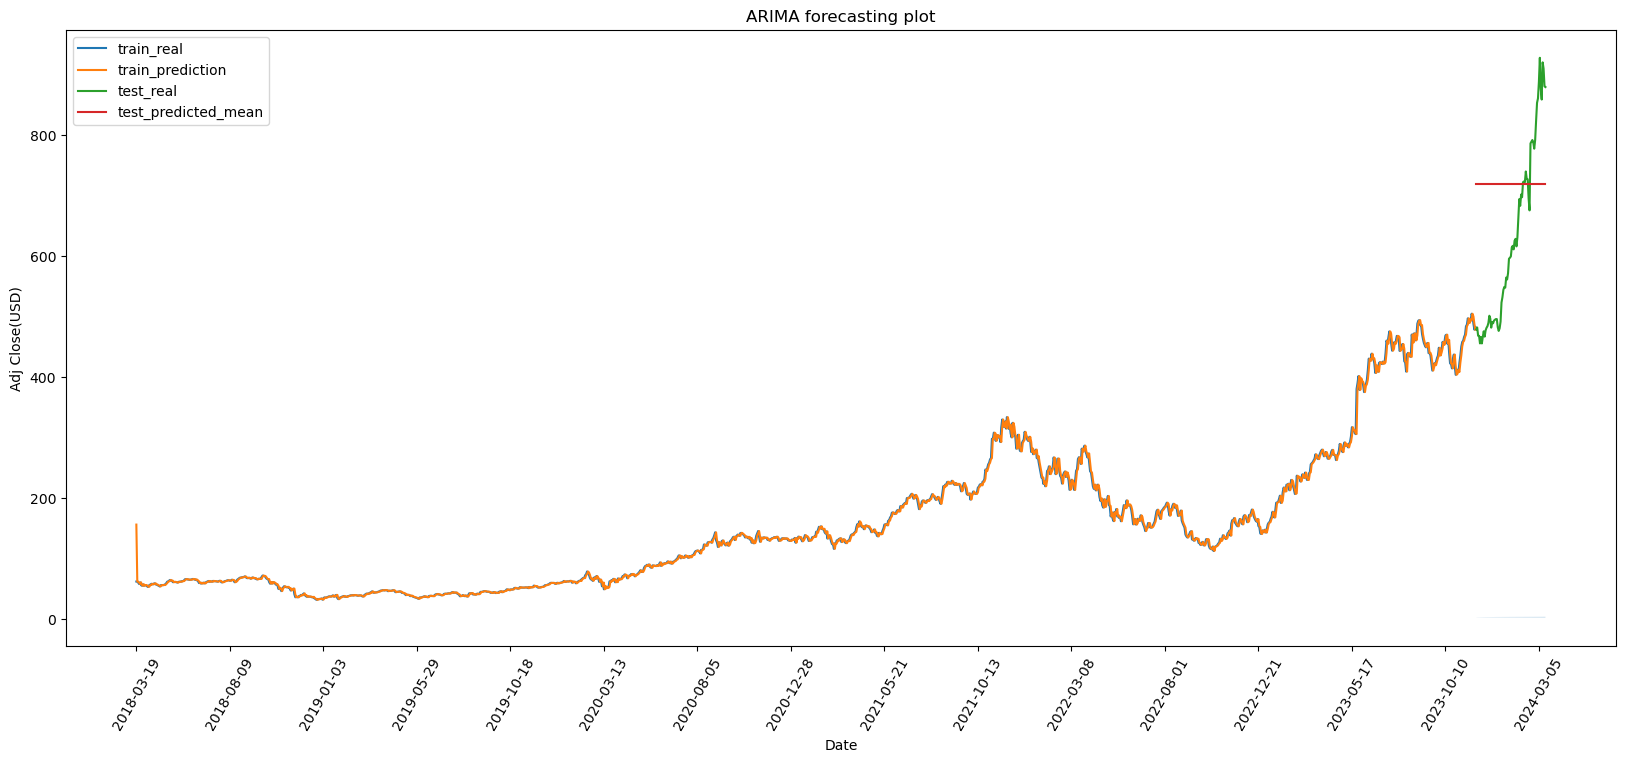

In [23]:
import matplotlib.ticker as ticker
# tick_spacing = 365
plt.figure(figsize=(20,8), dpi=100)
plt.plot(train_new['Date'], train_new['Adj Close'], label='train_real')
plt.plot(train_pred['Date'], train_pred[lambda df: df.columns[5]], label='train_prediction')
plt.plot(valid_pred['Date'], valid_pred['Adj Close'], label='test_real')
plt.plot(valid_pred['Date'], valid_pred['pre'], label='test_predicted_mean')
plt.fill_between(valid_pred['Date'], conf.iloc[:,0],conf.iloc[:,1],alpha = 0.2)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.legend(loc='upper left', fontsize=8)

tick_spacing = 100
x_ticks = range(0, len(data), tick_spacing)
plt.xticks(x_ticks)
x_labels = [str(i) for i in data['Date'][::tick_spacing]]
plt.gca().set_xticklabels(x_labels)

plt.title('ARIMA forecasting plot')
plt.xlabel('Date')
plt.xticks(rotation=60)   

plt.ylabel('Adj Close(USD)')
plt.legend()
plt.show()

In [24]:
# dates = pd.to_datetime(train_new['Date'])
# n = 100
# dates_to_show = dates[::n]

# dates2 = pd.to_datetime(train_pred['Date'])
# n = 100
# dates_to_show2 = dates2[::n]

# dates3 = pd.to_datetime(valid_pred['Date'])
# n = 100
# dates_to_show3 = dates2[::n]

# dates4 = pd.to_datetime(valid_pred['Date'])
# n = 100
# dates_to_show4 = dates2[::n]

# plt.figure(figsize=(20,8), dpi=100)
# plt.plot(dates, train_new['Adj Close'], label='train_real')
# plt.xticks(dates_to_show,rotation=45)

# plt.plot(dates2, train_pred[lambda df: df.columns[5]], label='train_prediction')
# plt.xticks(dates_to_show2,rotation=45)

# plt.plot(valid_pred['Date'], valid_pred['Adj Close'], label='test_real')
# plt.xticks(dates_to_show3,rotation=45)

# plt.plot(valid_pred['Date'], valid_pred['pre'], label='test_predicted_mean')
# plt.xticks(dates_to_show4,rotation=45)
# plt.fill_between(valid_pred['Date'], conf.iloc[:,0],conf.iloc[:,1],alpha = 0.2)


# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)

# plt.title('ARIMA forecasting plot')
# plt.xlabel('Date')
# plt.ylabel('Adj Close(USD)')
# plt.legend()
# import matplotlib.ticker as ticker
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=10))
# plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

aa_rmse = np.sqrt(mean_squared_error(train_pred['Adj Close'],train_pred['pre']))
print('RMSE on training set = %0.3f'% aa_rmse)
aa_mape = get_mape(train_pred['adj close'],train_pred['prediction'])
print('MAPE on training set = %0.3f%%'% aa_mape)

RMSE on training set = 6.539
MAPE on training set = 650.657%


In [26]:
a_rmse = np.sqrt(mean_squared_error(valid_pred['Adj Close'],valid_pred['pre']))
print('RMSE on test set = %0.3f'% a_rmse)
a_mape = get_mape(valid_pred['Adj Close'],valid_pred['pre'])
print('MAPE on test set = %0.3f%%'% a_mape)

RMSE on test set = 171.931
MAPE on test set = 27.427%
